
# Tutorial: Interpreting the Results of Cross-Validation

Di subchapter sebelumnya, kita telah berhasil menjalankan `cross_val_score` dan mendapatkan sebuah array berisi skor performa. Namun, mendapatkan angka-angka ini hanyalah separuh dari pekerjaan.

Langkah yang paling penting adalah **menginterpretasikan** hasil tersebut. Apa arti dari rata-rata skor? Apa yang ditunjukkan oleh standar deviasi? Bagaimana kita menyajikannya menjadi sebuah kesimpulan yang bermakna?

Di notebook ini, kita akan fokus pada cara membaca dan memahami output dari *cross-validation* untuk mendapatkan wawasan yang sebenarnya tentang performa model kita.




---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menginterpretasikan **rata-rata (mean)** dari skor CV sebagai estimasi performa utama.
* Menginterpretasikan **standar deviasi (standard deviation)** sebagai ukuran stabilitas atau konsistensi model.
* Menyatukan rata-rata dan standar deviasi ke dalam satu pernyataan kesimpulan yang komprehensif.
* Memahami dengan lebih dalam mengapa metrik error di Scikit-learn bernilai negatif.




---
### 2. Setup: Menjalankan Kembali `cross_val_score`

Mari kita siapkan kembali data dan model kita, lalu jalankan `cross_val_score` untuk mendapatkan hasil yang akan kita analisis. Kita akan menghitung R² dan RMSE untuk memiliki dua jenis metrik (relatif dan absolut).



In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Muat dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Inisialisasi model
model = LinearRegression()

# Jalankan CV untuk R-squared (K=10)
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Jalankan CV untuk MSE (untuk diubah menjadi RMSE)
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)

/usr/local/lib/python3.11/site-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

Model LinearRegression hasil pelatihan pada seluruh data:
Intercept: -36.941920207184396
Koefisien: {'MedInc': np.float64(0.43669329313432503), 'HouseAge': np.float64(0.009435778033238362), 'AveRooms': np.float64(-0.10732204139090447), 'AveBedrms': np.float64(0.6450656935198128), 'Population': np.float64(-3.976389421204504e-06), 'AveOccup': np.float64(-0.003786542654971009), 'Latitude': np.float64(-0.4213143775271445), 'Longitude': np.float64(-0.4345137546747772)}


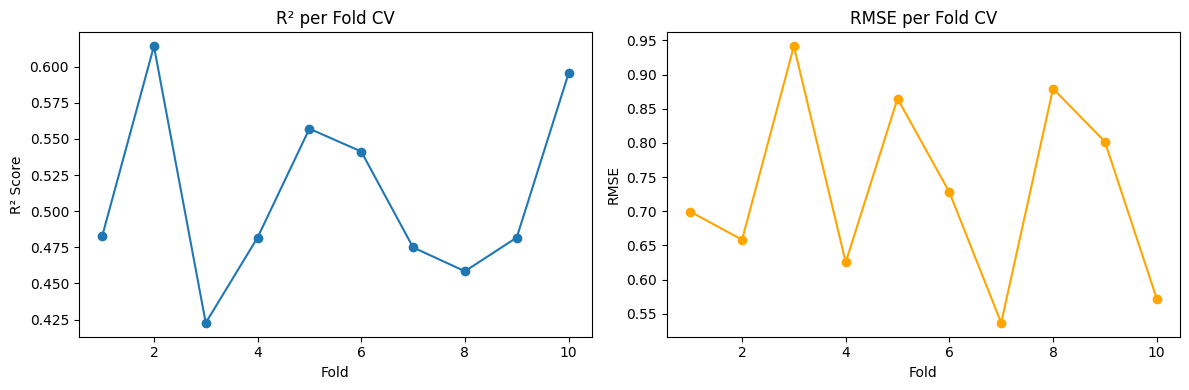

In [ ]:
# Fit model ke seluruh data (bukan hanya CV) dan tampilkan koefisien
model.fit(X, y)
print("Model LinearRegression hasil pelatihan pada seluruh data:")
print("Intercept:", model.intercept_)
print("Koefisien:", dict(zip(X.columns, model.coef_)))

# Plot skor R2 dan RMSE untuk setiap fold CV
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(range(1, len(r2_scores)+1), r2_scores, marker='o')
ax[0].set_title("R² per Fold CV")
ax[0].set_xlabel("Fold")
ax[0].set_ylabel("R² Score")

ax[1].plot(range(1, len(rmse_scores)+1), rmse_scores, marker='o', color='orange')
ax[1].set_title("RMSE per Fold CV")
ax[1].set_xlabel("Fold")
ax[1].set_ylabel("RMSE")

plt.tight_layout()
plt.show()


---
### 3. Interpretasi #1: Rata-Rata (Mean) - "Seberapa Bagus Model Kita?"

Rata-rata dari skor *cross-validation* adalah **estimasi terbaik dan paling andal** tentang bagaimana model Anda akan berperforma pada data baru yang belum pernah dilihatnya. Ini adalah angka utama yang harus Anda perhatikan.



In [ ]:

# Hitung rata-rata untuk setiap metrik
mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)

print(f"Hasil skor R² dari 10-fold CV: \n{r2_scores}\n")
print(f"Rata-rata R²: {mean_r2:.4f}")

print("-" * 40)

print(f"Hasil skor RMSE dari 10-fold CV: \n{rmse_scores}\n")
print(f"Rata-rata RMSE: {mean_rmse:.4f}")



Hasil skor R² dari 10-fold CV: 
[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]

Rata-rata R²: 0.5110
----------------------------------------
Hasil skor RMSE dari 10-fold CV: 
[0.69944301 0.65829982 0.94150821 0.62523308 0.86485438 0.72787552
 0.53664192 0.87935454 0.80190746 0.57228542]

Rata-rata RMSE: 0.7307



**Cara Menginterpretasikannya:**

* **Rata-rata R² (sekitar 0.51):** "Secara rata-rata, model Regresi Linear kami dapat menjelaskan sekitar **51%** dari variasi dalam harga rumah di California. Ini adalah performa yang moderat."
* **Rata-rata RMSE (sekitar 0.73):** "Secara rata-rata, prediksi harga rumah oleh model kami **meleset sekitar 0.73 unit** dari harga sebenarnya." (Karena target dalam dataset ini adalah dalam ratusan ribu dolar, ini berarti kesalahan sekitar $73,000).

Rata-rata ini jauh lebih bisa diandalkan daripada skor tunggal dari satu `train_test_split`.




---
### 4. Interpretasi #2: Standar Deviasi (Std Dev) - "Seberapa Stabil Performa Model?"

Standar deviasi memberi tahu kita seberapa **konsisten** atau **stabil** performa model di berbagai subset data. Ini adalah ukuran **kepercayaan diri** kita pada skor rata-rata.

* **Standar Deviasi Rendah:** Bagus! Ini berarti performa model konsisten. Angka rata-rata yang kita dapatkan sangat bisa diandalkan.
* **Standar Deviasi Tinggi:** Tanda bahaya. Ini berarti performa model sangat bervariasi. Mungkin saja model bekerja sangat baik pada beberapa jenis data, tetapi sangat buruk pada jenis data lainnya. Rata-rata skornya menjadi kurang bisa diandalkan.



In [ ]:

# Hitung standar deviasi untuk setiap metrik
std_r2 = np.std(r2_scores)
std_rmse = np.std(rmse_scores)

print(f"Standar Deviasi R²: {std_r2:.4f}")
print(f"Standar Deviasi RMSE: {std_rmse:.4f}")



Standar Deviasi R²: 0.0593
Standar Deviasi RMSE: 0.1303



**Cara Menginterpretasikannya:**

Cara paling umum untuk melaporkan ini adalah dengan format `rata-rata ± standar deviasi`.

* **R²:** "Performa model diperkirakan memiliki R-squared sebesar **0.51 ± 0.05**." Standar deviasi 0.05 ini cukup kecil dibandingkan rata-ratanya, yang menunjukkan bahwa performa model kita stabil.
* **RMSE:** "Kesalahan prediksi model diperkirakan sebesar **0.73 ± 0.13**." Standar deviasi 0.13 ini relatif lebih kecil dibandingkan rata-ratanya, yang menunjukkan bahwa besarnya kesalahan model lebih konsisten.




---
### 5. Menyusun Kesimpulan Akhir

Sekarang, mari kita gabungkan semua wawasan ini menjadi sebuah kesimpulan yang komprehensif, seolah-olah kita sedang melaporkannya kepada tim atau manajer.

> **"Berdasarkan evaluasi menggunakan 10-fold cross-validation, model Regresi Linear kami menunjukkan performa yang moderat. Model ini dapat menjelaskan sekitar 51% dari variasi harga rumah (R² rata-rata = 0.51), namun performanya cukup bervariasi tergantung pada data yang diuji (standar deviasi R² = 0.05). Dari segi akurasi prediksi, model ini secara rata-rata memiliki kesalahan prediksi (RMSE) sekitar $73,000 dari harga rumah sebenarnya, dengan tingkat kesalahan yang cukup konsisten (standar deviasi RMSE = $13,000)."**

Pernyataan ini jauh lebih profesional, informatif, dan jujur daripada sekadar berkata, "Modelnya punya R-squared 0.49."




---
### 6. Kesimpulan Tutorial

* Selalu lihat **rata-rata** dan **standar deviasi** dari hasil *cross-validation*.
* **Rata-rata** memberi tahu Anda **estimasi performa** yang paling mungkin.
* **Standar deviasi** memberi tahu Anda **seberapa besar Anda bisa mempercayai** estimasi performa tersebut.
* Gabungkan keduanya untuk menyajikan analisis performa model yang lengkap dan andal.
